In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler

In [ ]:
df = pd.read_csv('./boston/train.csv')
df.info()

In [ ]:
X = df[['nox', 'rm', 'chas', 'dis', 'ptratio', 'lstat', 'rad']].values
y = df['medv'].values

In [ ]:
print(X.shape)

In [ ]:
print(X)

In [ ]:
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)

In [ ]:
print(scaled_X)

In [ ]:
poly = PolynomialFeatures(2)

In [ ]:
new_X = poly.fit_transform(scaled_X)

In [ ]:
print(new_X.shape)

In [ ]:
print(new_X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.1, random_state=40)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print('Score: {}'.format(lr.score(X_test, y_test)))

# New York Taxi Cab

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./nyc/train.csv', nrows=100000)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
key                  100000 non-null object
fare_amount          100000 non-null float64
pickup_datetime      100000 non-null object
pickup_longitude     100000 non-null float64
pickup_latitude      100000 non-null float64
dropoff_longitude    100000 non-null float64
dropoff_latitude     100000 non-null float64
passenger_count      100000 non-null int64
dtypes: float64(5), int64(1), object(2)
memory usage: 6.1+ MB


In [4]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
X = df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']].values
y = df[['fare_amount']].values

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
linear_model = LinearRegression()

In [10]:
linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
y_pred = linear_model.predict(X_test)

In [12]:
from sklearn.metrics import mean_squared_error

In [13]:
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))

MSE: 105.96878801867155


In [14]:
print('Score: {}'.format(linear_model.score(X_test, y_test)))

Score: -0.0003293931069376921


In [16]:
_c = pd.DataFrame({'actuals': y_test.reshape(-1), 'predicted': y_pred.reshape(-1)})

In [18]:
_c.tail()

,actuals,predicted
9995,4.9,11.233749
9996,7.0,11.873420
9997,9.7,11.234805
9998,5.7,11.234372
9999,7.7,11.362982


## train a better model
### Engineer new features

In [19]:
df[['fare_amount']].describe()

,fare_amount
count,100000.000000
mean,11.354652
std,9.716777
min,-44.900000
25%,6.000000
50%,8.500000
75%,12.500000
max,200.000000


## limit the fare_amount to between 1 and 13 USD

In [25]:
new_df = df[df.fare_amount >= 1]

In [26]:
new_df[['fare_amount']].describe()

,fare_amount
count,99986.000000
mean,11.356954
std,9.714608
min,2.500000
25%,6.000000
50%,8.500000
75%,12.500000
max,200.000000


In [27]:
new_df = new_df[df.fare_amount < 13]

/Users/robert/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [28]:
new_df[['fare_amount']].describe()

,fare_amount
count,75954.000000
mean,7.436234
std,2.473575
min,2.500000
25%,5.500000
50%,7.000000
75%,9.300000
max,12.900000


In [29]:
X = new_df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']].values
y = new_df[['fare_amount']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [30]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))
print('Score: {}'.format(linear_model.score(X_test, y_test)))

MSE: 6.100836463079646
Score: 0.0006751686917658706


In [31]:
_c = pd.DataFrame({'actuals': y_test.reshape(-1), 'predicted': y_pred.reshape(-1)})

In [32]:
_c.head()

,actuals,predicted
0,8.0,7.427953
1,12.5,7.444392
2,11.5,7.427988
3,9.3,7.491581
4,5.7,7.492264


In [33]:
new_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,75954.000000,75954.000000,75954.000000,75954.000000,75954.000000,75954.000000
mean,7.436234,-72.549976,39.946265,-72.528212,39.938923,1.659610
std,2.473575,10.586520,6.133436,10.349941,6.000269,1.287191
min,2.500000,-736.550000,-74.007670,-84.654241,-74.001140,0.000000
25%,5.500000,-73.991898,40.737593,-73.991378,40.738073,1.000000
50%,7.000000,-73.982062,40.753452,-73.981072,40.754094,1.000000
75%,9.300000,-73.969295,40.766631,-73.968376,40.767410,2.000000
max,12.900000,40.787575,401.083332,40.786205,43.415190,6.000000


In [34]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75954 entries, 0 to 99999
Data columns (total 8 columns):
key                  75954 non-null object
fare_amount          75954 non-null float64
pickup_datetime      75954 non-null object
pickup_longitude     75954 non-null float64
pickup_latitude      75954 non-null float64
dropoff_longitude    75954 non-null float64
dropoff_latitude     75954 non-null float64
passenger_count      75954 non-null int64
dtypes: float64(5), int64(1), object(2)
memory usage: 5.2+ MB


## take date and time into consideration

In [35]:
new_df['_pickup_datetime'] = pd.to_datetime(new_df['pickup_datetime'])

In [36]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75954 entries, 0 to 99999
Data columns (total 9 columns):
key                  75954 non-null object
fare_amount          75954 non-null float64
pickup_datetime      75954 non-null object
pickup_longitude     75954 non-null float64
pickup_latitude      75954 non-null float64
dropoff_longitude    75954 non-null float64
dropoff_latitude     75954 non-null float64
passenger_count      75954 non-null int64
_pickup_datetime     75954 non-null datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(2)
memory usage: 5.8+ MB


## extract interesting information from datetime

In [39]:
new_df['_month'] = new_df._pickup_datetime.dt.month

In [40]:
new_df['_day'] = new_df._pickup_datetime.dt.day

In [41]:
new_df['_dayofweek'] = new_df._pickup_datetime.dt.dayofweek

In [42]:
new_df['_hour'] = new_df._pickup_datetime.dt.hour

## extract direction of travel

In [43]:
new_df['_lon_diff'] = new_df['pickup_longitude'] - new_df['dropoff_longitude']
new_df['_lat_diff'] = new_df['pickup_latitude'] - new_df['dropoff_latitude']

In [44]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75954 entries, 0 to 99999
Data columns (total 15 columns):
key                  75954 non-null object
fare_amount          75954 non-null float64
pickup_datetime      75954 non-null object
pickup_longitude     75954 non-null float64
pickup_latitude      75954 non-null float64
dropoff_longitude    75954 non-null float64
dropoff_latitude     75954 non-null float64
passenger_count      75954 non-null int64
_pickup_datetime     75954 non-null datetime64[ns, UTC]
_month               75954 non-null int64
_day                 75954 non-null int64
_dayofweek           75954 non-null int64
_hour                75954 non-null int64
_lon_diff            75954 non-null float64
_lat_diff            75954 non-null float64
dtypes: datetime64[ns, UTC](1), float64(7), int64(5), object(2)
memory usage: 9.3+ MB


# train our model again

In [45]:
X = new_df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', '_month', '_day', '_dayofweek', '_hour', '_lon_diff', '_lat_diff']].values
y = new_df[['fare_amount']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [46]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))
print('Score: {}'.format(linear_model.score(X_test, y_test)))

MSE: 6.094705568025228
Score: 0.0016794171588575548


# try to visualize

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

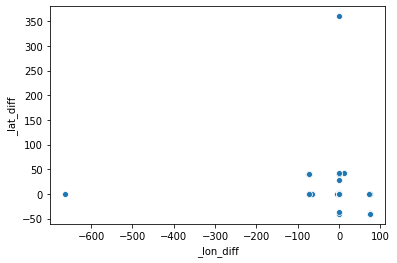

In [48]:
sns.scatterplot(x='_lon_diff', y='_lat_diff', data=new_df)

In [49]:
new_df = new_df[new_df._lon_diff > -100]

In [50]:
new_df = new_df[new_df._lat_diff < 50]

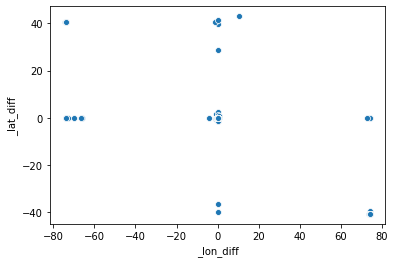

In [51]:
sns.scatterplot(x='_lon_diff', y='_lat_diff', data=new_df)

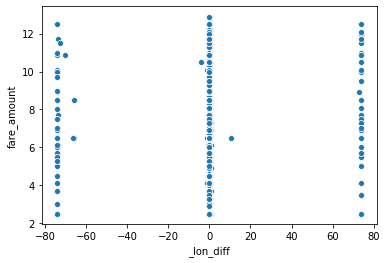

In [52]:
sns.scatterplot(x='_lon_diff', y='fare_amount', data=new_df)

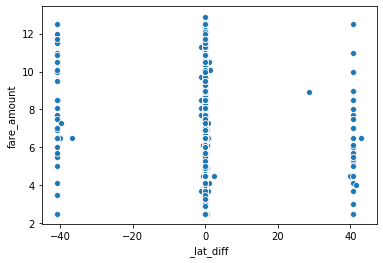

In [53]:
sns.scatterplot(x='_lat_diff', y='fare_amount', data=new_df)

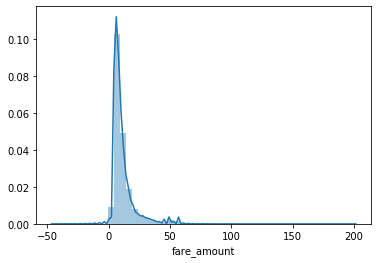

In [54]:
sns.distplot(df['fare_amount'])

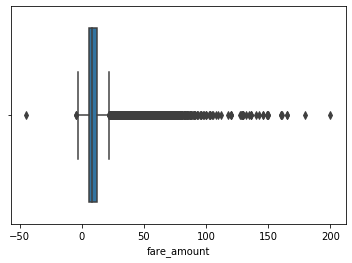

In [55]:
sns.boxplot(df['fare_amount'])

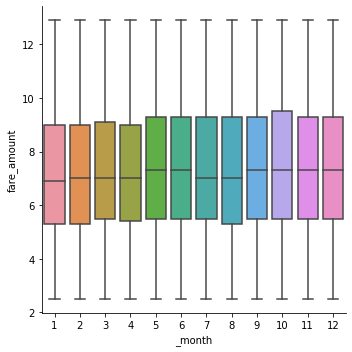

In [57]:
sns.catplot(y='fare_amount', x='_month', kind='box', data=new_df)

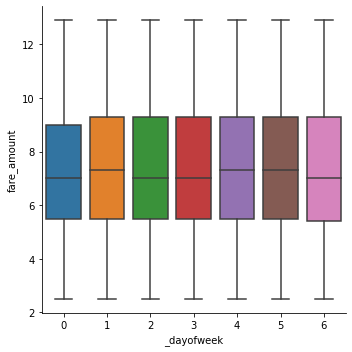

In [58]:
sns.catplot(y='fare_amount', x='_dayofweek', kind='box', data=new_df)

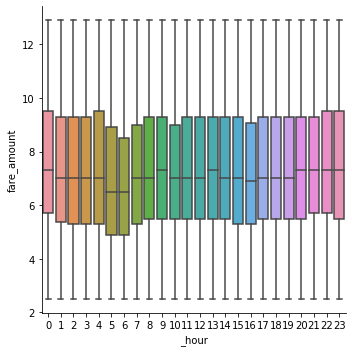

In [59]:
sns.catplot(y='fare_amount', x='_hour', kind='box', data=new_df)

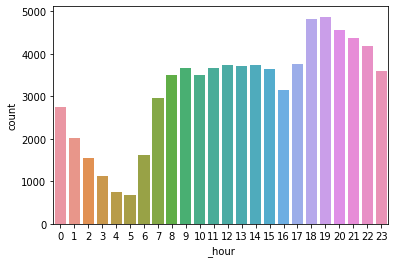

In [61]:
sns.countplot(x='_hour', data=new_df)

In [62]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75952 entries, 0 to 99999
Data columns (total 15 columns):
key                  75952 non-null object
fare_amount          75952 non-null float64
pickup_datetime      75952 non-null object
pickup_longitude     75952 non-null float64
pickup_latitude      75952 non-null float64
dropoff_longitude    75952 non-null float64
dropoff_latitude     75952 non-null float64
passenger_count      75952 non-null int64
_pickup_datetime     75952 non-null datetime64[ns, UTC]
_month               75952 non-null int64
_day                 75952 non-null int64
_dayofweek           75952 non-null int64
_hour                75952 non-null int64
_lon_diff            75952 non-null float64
_lat_diff            75952 non-null float64
dtypes: datetime64[ns, UTC](1), float64(7), int64(5), object(2)
memory usage: 11.8+ MB


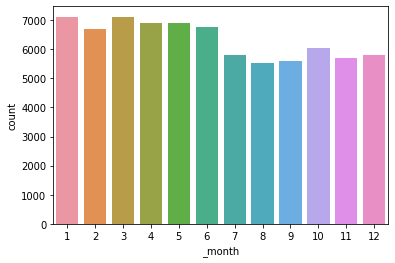

In [63]:
sns.countplot(x='_month', data=new_df)

In [64]:
new_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,_pickup_datetime,_month,_day,_dayofweek,_hour,_lon_diff,_lat_diff
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15 17:26:21+00:00,6,15,0,17,-0.002701,0.009041
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18 00:35:00+00:00,8,18,3,0,0.008504,0.010708
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21 04:30:42+00:00,4,21,5,4,0.004437,-0.024949
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09 07:51:00+00:00,3,9,1,7,-0.011440,-0.015754
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1,2011-01-06 09:50:45+00:00,1,6,3,9,-0.028072,-0.026603


# convert all categorical variables

In [65]:
month_df = pd.get_dummies(new_df['_month'], prefix='_month', drop_first=True)

In [66]:
new_df = pd.concat([new_df, month_df], axis=1)

In [67]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75952 entries, 0 to 99999
Data columns (total 26 columns):
key                  75952 non-null object
fare_amount          75952 non-null float64
pickup_datetime      75952 non-null object
pickup_longitude     75952 non-null float64
pickup_latitude      75952 non-null float64
dropoff_longitude    75952 non-null float64
dropoff_latitude     75952 non-null float64
passenger_count      75952 non-null int64
_pickup_datetime     75952 non-null datetime64[ns, UTC]
_month               75952 non-null int64
_day                 75952 non-null int64
_dayofweek           75952 non-null int64
_hour                75952 non-null int64
_lon_diff            75952 non-null float64
_lat_diff            75952 non-null float64
_month_2             75952 non-null uint8
_month_3             75952 non-null uint8
_month_4             75952 non-null uint8
_month_5             75952 non-null uint8
_month_6             75952 non-null uint8
_month_7             

In [68]:
new_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,_pickup_datetime,_month,...,_month_3,_month_4,_month_5,_month_6,_month_7,_month_8,_month_9,_month_10,_month_11,_month_12
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15 17:26:21+00:00,6,...,0,0,0,1,0,0,0,0,0,0
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18 00:35:00+00:00,8,...,0,0,0,0,0,1,0,0,0,0
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21 04:30:42+00:00,4,...,0,1,0,0,0,0,0,0,0,0
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09 07:51:00+00:00,3,...,1,0,0,0,0,0,0,0,0,0
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1,2011-01-06 09:50:45+00:00,1,...,0,0,0,0,0,0,0,0,0,0


In [70]:
X = new_df.drop(['fare_amount', 'key', 'pickup_datetime', '_pickup_datetime'], axis=1).values
y = new_df[['fare_amount']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))
print('Score: {}'.format(linear_model.score(X_test, y_test)))

MSE: 6.08237903432413
Score: 0.0005125554309314273


# repeat for _day

# repeat for _dayofweek

# repeat for _hour